In [40]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def generate_data(m):
    """
    Generates the synthetic data as described above.
    
    Parameters:
    m (int): The number of data points to generate.
    
    Returns:
    w_star (numpy array): The true weight vector.
    X (numpy array): The matrix of input features (shape: m x 10).
    Y (numpy array): The vector of output labels (shape: m).
    """
    
    # Step 1: Generate the true weight vector w* with norm 1
    w_star = np.random.normal(0, 1, 10)
    w_star = w_star / np.linalg.norm(w_star)
    
    # Step 2: Generate m random vectors each in R^10
    X = np.random.normal(0, 1, (m, 10))
    
    # Step 3: Generate the labels using the GenLabel function
    Y = np.zeros(m)
    for i in range(m):
        prob = sigmoid(np.dot(w_star, X[i]))
        Y[i] = np.random.uniform(0, 1) <= prob
    
    return w_star, X, Y



## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import time

def logistic_regression(X, Y):
    """
    Trains a logistic regression model on the input data and returns the weight vector.
    
    Parameters:
    X (numpy array): The matrix of input features (shape: m x 10).
    Y (numpy array): The vector of output labels (shape: m).
    
    Returns:
    w_prime (numpy array): The learned weight vector (shape: 10).
    """
    # Instantiate the Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    
    # Fit the model on the data
    model.fit(X, Y)
    
    # Get the weight vector
    w_prime = model.coef_[0]

    return w_prime



## Algorithm 2: gradient descent with square loss

Square loss is defined as:
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss using a custom implementation of gradient descent -- run for 1000 iterations, use step size eta = 0.01).

 The gradient of the square loss function with respect to $w$ is given by:

\begin{equation*}
\nabla_w L_i\left(w^{(t)}\right)=\left(\sigma\left(w^{(t)} \cdot x\right)-y_i\right) \sigma\left(w^{(t)} \cdot x\right)\left(1-\sigma\left(w^{(t)} \cdot x\right)\right) x
\end{equation*}

In [43]:
def square_loss_gradient(w, x, y):
    """
    Computes the gradient of the square loss function with respect to the weight vector.
    
    Parameters:
    w (numpy array): The current weight vector (shape: 10).
    x (numpy array): A single input feature vector (shape: 10).
    y (float): The true label for the input feature vector.
    
    Returns:
    numpy array: The gradient of the square loss function (shape: 10).
    """
    sigma_wx = sigmoid(np.dot(w, x))
    loss_gradient = (sigma_wx - y) * sigma_wx * (1 - sigma_wx) * x
    return loss_gradient

def gradient_descent(X, Y, eta=0.01, max_iter=1000):
    """
    Implements gradient descent to minimize the square loss and iteratively learn the weight vector.

    Parameters:
    X (numpy array): The matrix of input features (shape: m x 10).
    Y (numpy array): The vector of output labels (shape: m).
    eta (float): The learning rate.
    max_iter (int): The maximum number of iterations.
    
    Returns:
    w_prime (numpy array): Learned weight vector (shape: 10).
    """
    # Initialize the weight vector with zeros
    w_prime = np.zeros(10)
    
    # Number of training examples
    m = len(Y)
    
    # Perform gradient descent
    for i in range(max_iter):
        # Compute the gradient of the loss function (averaged over all training examples)
        gradient = np.mean([square_loss_gradient(w_prime, X[j], Y[j]) for j in range(m)], axis=0)
        
        # Update the weight vector
        w_prime -= eta * gradient
    
    return w_prime


## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [44]:
def stochastic_gradient_descent(X, Y, eta=0.01, max_iter=1000):
    """
    Performs stochastic gradient descent to minimize the square loss and learn the weight vector.
    
    Parameters:
    X (numpy array): The matrix of input features (shape: m x 10).
    Y (numpy array): The vector of output labels (shape: m).
    eta (float): The learning rate.
    max_iter (int): The maximum number of iterations.
    
    Returns:
    w_prime (numpy array): The learned weight vector (shape: 10).
    """
    # Initialize the weight vector with zeros
    w_prime = np.zeros(10)
    
    # Number of training examples
    m = len(Y)
    
    # Perform stochastic gradient descent
    for i in range(max_iter):
        # Randomly select a training example
        j = np.random.randint(0, m)
        
        # Compute the gradient of the loss function with respect to the selected training example
        gradient = square_loss_gradient(w_prime, X[j], Y[j])
        
        # Update the weight vector
        w_prime -= eta * gradient
    
    return w_prime



## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Total Time Taken (in seconds):
  Logistic Regression: 0.0678 s
  Gradient Descent: 22.0300 s
  Stochastic Gradient Descent: 0.2937 s



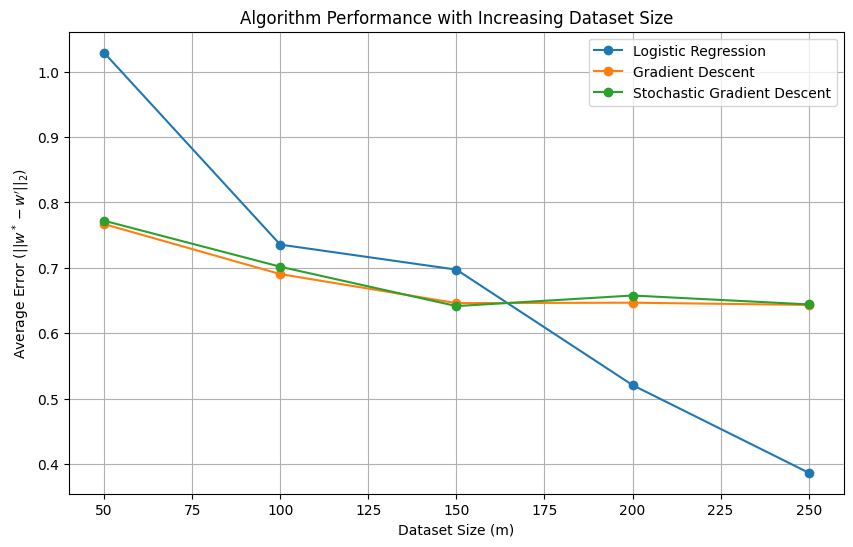

In [45]:
# Evaluation function
def evaluate_algorithms(m_values=[50, 100, 150, 200, 250], n_runs=10):
    results = {
        "m_values": m_values,
        "logistic_regression": {"errors": [], "time": 0},
        "gradient_descent": {"errors": [], "time": 0},
        "stochastic_gradient_descent": {"errors": [], "time": 0},
    }
    for m in m_values:
        errors_lr, errors_gd, errors_sgd = [], [], []
        for i in range(n_runs):
            # Initialize fresh data and weight vector
            w_star, X, Y = generate_data(m)

            # Run Logistic Regression
            start_time = time.time()
            w_prime = logistic_regression(X, Y)
            results["logistic_regression"]["time"] += time.time() - start_time
            errors_lr.append(np.linalg.norm(w_star - w_prime))

            # Run Gradient Descent
            start_time = time.time()
            w_prime = gradient_descent(X, Y)
            results["gradient_descent"]["time"] += time.time() - start_time
            errors_gd.append(np.linalg.norm(w_star - w_prime))

            # Run Stochastic Gradient Descent
            start_time = time.time()
            w_prime = stochastic_gradient_descent(X, Y)
            results["stochastic_gradient_descent"]["time"] += time.time() - start_time
            errors_sgd.append(np.linalg.norm(w_star - w_prime))

        # Compute the average error for each algorithm
        results["logistic_regression"]["errors"].append(np.mean(errors_lr))
        results["gradient_descent"]["errors"].append(np.mean(errors_gd))
        results["stochastic_gradient_descent"]["errors"].append(np.mean(errors_sgd))
    return results

# Running the evaluation function and printing the results
results = evaluate_algorithms()
# Printing of the total time taken for each algorithm
print(f"Total Time Taken (in seconds):\n"
      f"  Logistic Regression: {results['logistic_regression']['time']:.4f} s\n"
      f"  Gradient Descent: {results['gradient_descent']['time']:.4f} s\n"
      f"  Stochastic Gradient Descent: {results['stochastic_gradient_descent']['time']:.4f} s\n")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(results['m_values'], results['logistic_regression']['errors'], marker='o', label='Logistic Regression')
plt.plot(results['m_values'], results['gradient_descent']['errors'], marker='o', label='Gradient Descent')
plt.plot(results['m_values'], results['stochastic_gradient_descent']['errors'], marker='o', label='Stochastic Gradient Descent')
plt.xlabel('Dataset Size (m)')
plt.ylabel('Average Error ($||w^* - w\'||_2$)')
plt.title('Algorithm Performance with Increasing Dataset Size')
plt.legend()
plt.grid(True)
plt.show()
